In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv("Desktop/covid19-global-forecasting-week-5/train.csv")

C:\Users\beast brothers\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [4]:
df.isna().sum()

Id                    0
County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:

data_confirm=df[df['Target']=='ConfirmedCases'].copy()
data_confirm.reset_index(drop=True,inplace=True)
data_fat=df[df['Target']=='Fatalities'].copy()
data_fat.reset_index(drop=True,inplace=True)

In [8]:
data_confirm.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
2,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-26,ConfirmedCases,0
4,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-27,ConfirmedCases,0


In [9]:
data_fat.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
1,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-25,Fatalities,0
3,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-26,Fatalities,0
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-27,Fatalities,0


In [10]:
data_confirm.drop('Target',axis=1,inplace=True)
data_fat.drop('Target',axis=1,inplace=True)

In [11]:
confirm_country_cases=data_confirm.groupby('Country_Region').mean()
fat_country_cases=data_confirm.groupby('Country_Region').mean()

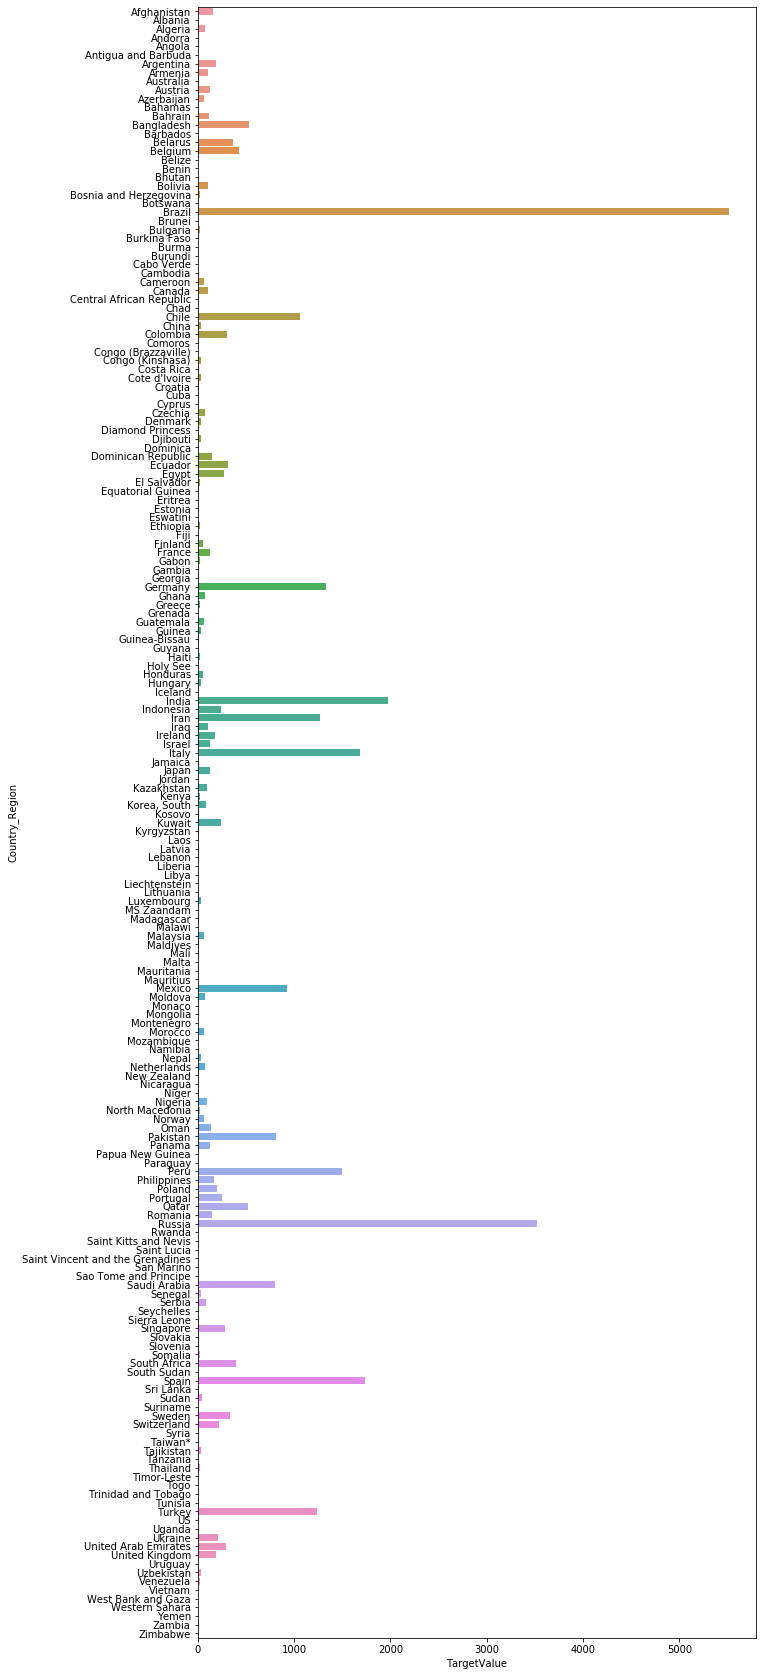

In [12]:
plt.figure(figsize=(10,30))
sn.barplot(confirm_country_cases['TargetValue'],confirm_country_cases.index)

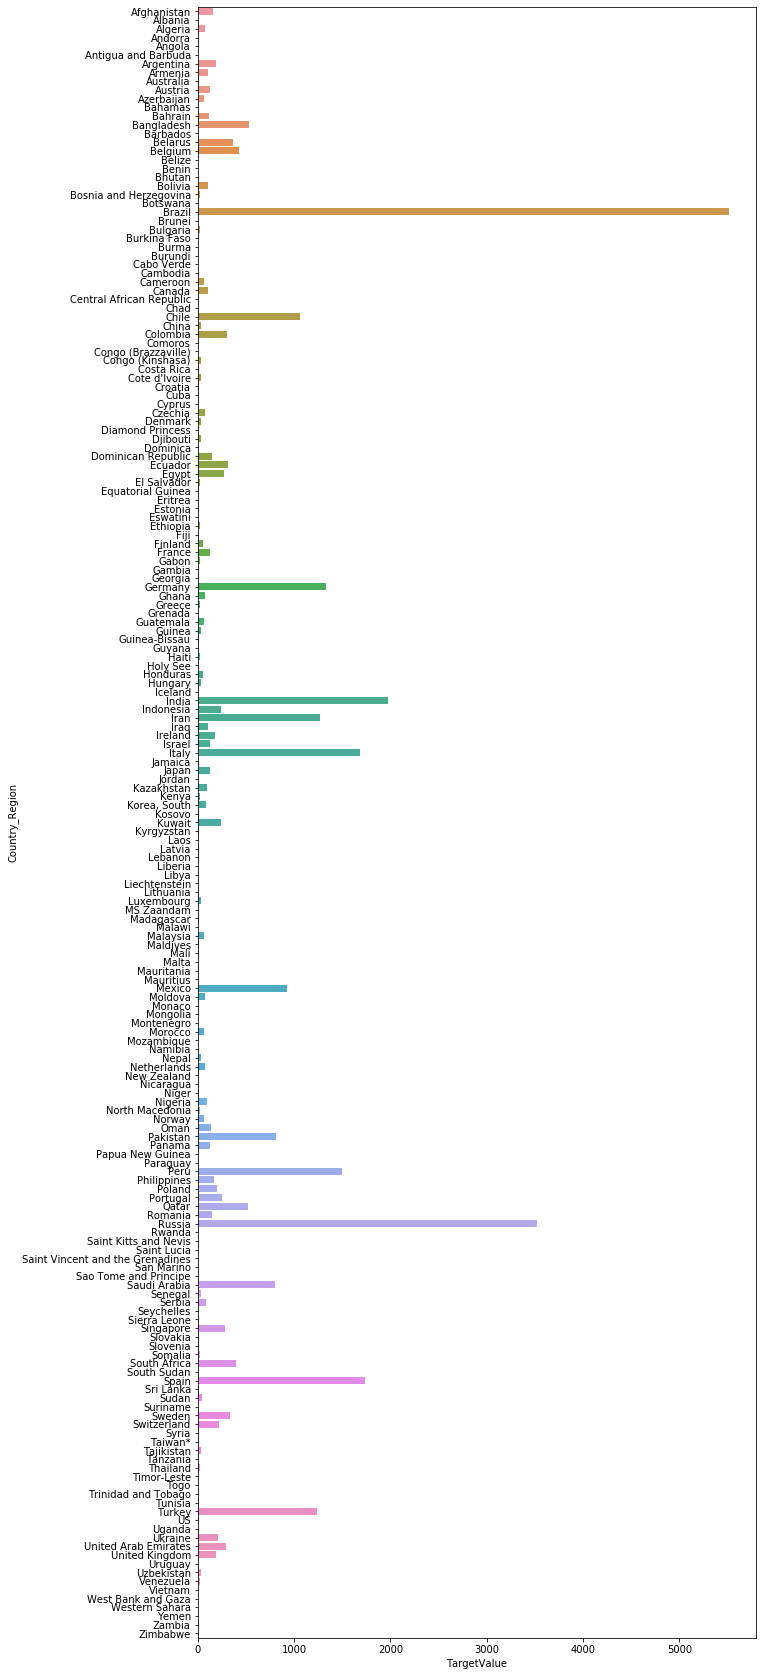

In [13]:
plt.figure(figsize=(10,30))
sn.barplot(fat_country_cases['TargetValue'],fat_country_cases.index)

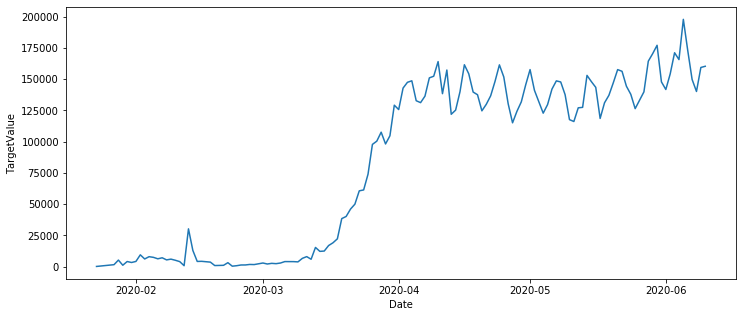

In [14]:
#cases according to dates
cases_d=data_confirm.groupby('Date').sum()
plt.figure(figsize=(12,5))
sn.lineplot(cases_d.index,cases_d['TargetValue'])


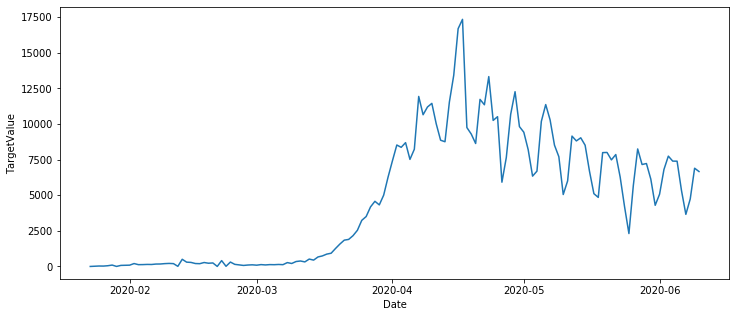

In [15]:
#fatalities according to date
cases_f=data_fat.groupby('Date').sum()
plt.figure(figsize=(12,5))
sn.lineplot(cases_f.index,cases_f['TargetValue'])


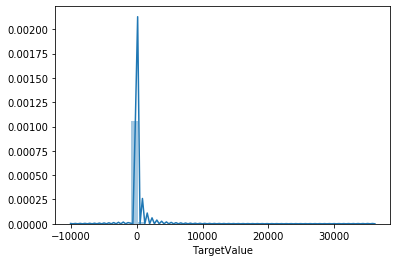

In [16]:
sn.distplot(data_confirm.TargetValue)

there are some missing values which they covered by giving negative values

C:\Users\beast brothers\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


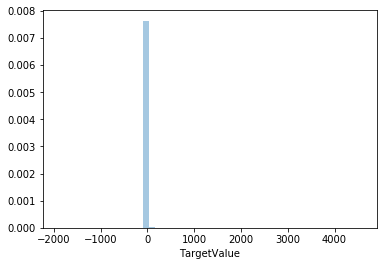

In [17]:
sn.distplot(data_fat.TargetValue)

In [18]:
data_fat[data_fat.TargetValue<0]

,County,Province_State,Country_Region,Population,Weight,Date,TargetValue
1670,NaN,Queensland,Australia,5095100,0.647509,2020-06-01,-1
2370,NaN,NaN,Australia,25359662,0.586556,2020-06-01,-1
6797,NaN,Prince Edward Island,Canada,158158,0.835327,2020-04-09,-1
6919,NaN,Quebec,Canada,8537674,0.626566,2020-03-22,-1
13793,NaN,NaN,Cyprus,847000,0.732630,2020-04-05,-2
...,...,...,...,...,...,...,...
475664,Sauk,Wisconsin,US,64442,0.903054,2020-04-16,-1
476957,Walworth,Wisconsin,US,103868,0.865734,2020-05-19,-1
478097,NaN,Wisconsin,US,5813568,0.642026,2020-06-08,-1
482683,NaN,Channel Islands,United Kingdom,170499,0.830117,2020-05-05,-1


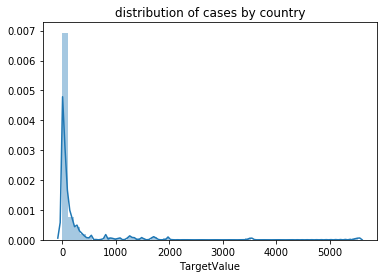

In [19]:
sn.distplot(confirm_country_cases.TargetValue)
plt.title('distribution of cases by country')
plt.show()

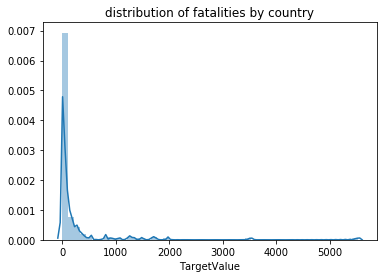

In [20]:
sn.distplot(fat_country_cases.TargetValue)
plt.title('distribution of fatalities by country')
plt.show()

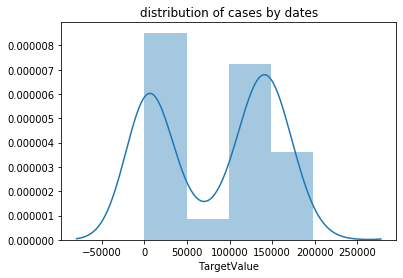

In [21]:
sn.distplot(cases_d.TargetValue)
plt.title('distribution of cases by dates')
plt.show()

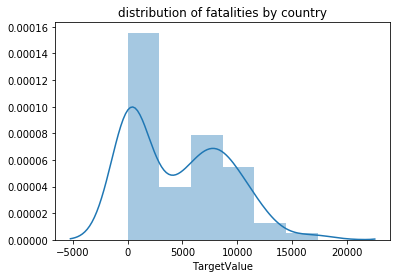

In [22]:
sn.distplot(cases_f.TargetValue)
plt.title('distribution of fatalities by country')
plt.show()

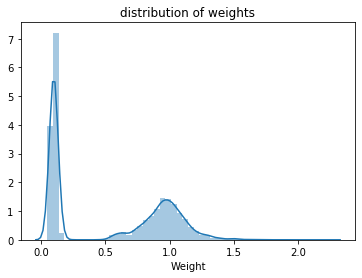

In [23]:
sn.distplot(df.Weight)
plt.title('distribution of weights')
plt.show()

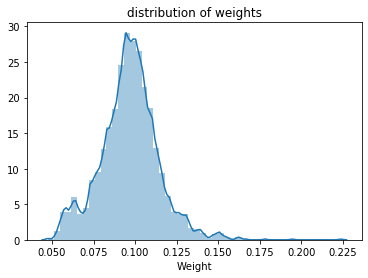

In [24]:
sn.distplot(data_confirm.Weight)
plt.title('distribution of weights')
plt.show()

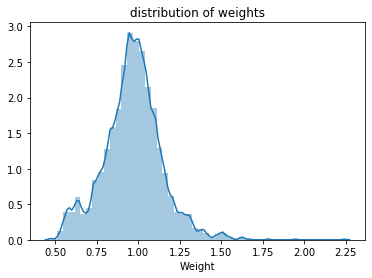

In [25]:
sn.distplot(data_fat.Weight)
plt.title('distribution of weights')
plt.show()

In [26]:
##tring to forecast confirmed_cases on overall data not considering contry-wise
#we can do granger causality test and find whether confirmed cases may cause fatalities to predict. if it does we can use varma model
data_confirm.head()

,County,Province_State,Country_Region,Population,Weight,Date,TargetValue
0,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,0
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,0
2,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,0
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-26,0
4,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-27,0


In [27]:
train=data_confirm.drop(['County','Province_State','Country_Region','Population'],axis=1).copy()

In [28]:
train.head()

,Weight,Date,TargetValue
0,0.058359,2020-01-23,0
1,0.058359,2020-01-24,0
2,0.058359,2020-01-25,0
3,0.058359,2020-01-26,0
4,0.058359,2020-01-27,0


In [29]:
train_data=train.groupby('Date').mean()


In [30]:
train_data.head()

,Weight,TargetValue
Date,,
2020-01-23,0.096522,0.056021
2020-01-24,0.096522,0.162865
2020-01-25,0.096522,0.282703
2020-01-26,0.096522,0.392146
2020-01-27,0.096522,0.465492


In [31]:
min(train_data.index),max(train_data.index)

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-06-10 00:00:00'))

In [32]:
train_data.index.freq='D'

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

C:\Users\beast brothers\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\beast brothers\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [34]:
decompose=seasonal_decompose(train_data.TargetValue)

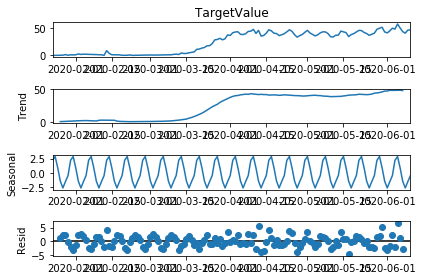

In [35]:
decompose.plot();

In [36]:
def find_stationary(target):
    results=adfuller(target,autolag='t-stat')
    print(f"the t-stat value is {results[0]}\n the p-value is {results[1]}")
    if results[1]<0.05:
        print('\nit is stationary')
    else:
        print('\nit is not stationary')

In [37]:
find_stationary(train_data.TargetValue)

the t-stat value is -1.1895872386722126
 the p-value is 0.678058902714126

it is not stationary


In [38]:
train_data_shift1=train_data.diff().dropna()
find_stationary(train_data_shift1.TargetValue)

the t-stat value is -2.1740901807636868
 the p-value is 0.21578323760281193

it is not stationary


In [39]:
train_data_log=np.log(train_data)
find_stationary(train_data_log.TargetValue)

the t-stat value is -1.001848209721773
 the p-value is 0.7525896124151021

it is not stationary


In [40]:

train_data_shift2=train_data_shift1.diff(periods=1).dropna()
find_stationary(train_data_shift2.TargetValue)

the t-stat value is -4.8675275481077485
 the p-value is 4.032168777114938e-05

it is stationary


In [42]:
train_data_shift2.head()

,Weight,TargetValue
Date,,
2020-01-25,0.0,0.012995
2020-01-26,0.0,-0.010396
2020-01-27,0.0,-0.036096
2020-01-28,0.0,0.987005
2020-01-29,0.0,-2.249206


C:\Users\beast brothers\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


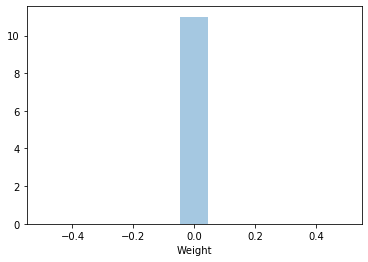

In [43]:
sn.distplot(train_data_shift2['Weight'])

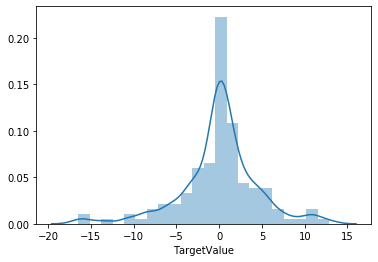

In [44]:
sn.distplot(train_data_shift2['TargetValue'])

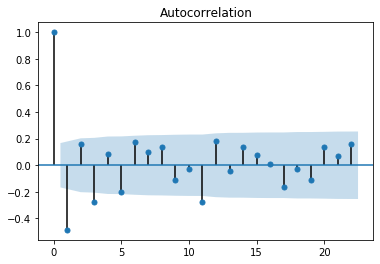

In [45]:
plot_acf(train_data_shift2.TargetValue);

C:\Users\beast brothers\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


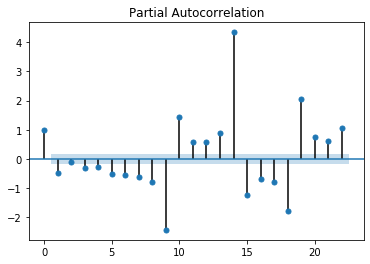

In [46]:
plot_pacf(train_data_shift2.TargetValue);

we are able to make series stationary by taking d=2

In [47]:
from pmdarima import auto_arima

In [54]:
import warnings
warnings.filterwarnings(action='ignore')

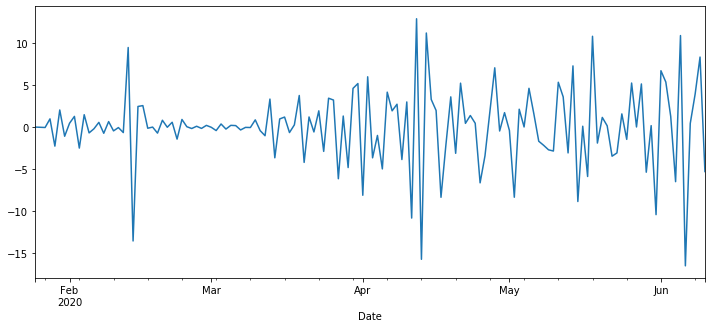

In [58]:
train_data_shift2['TargetValue'].plot(figsize=(12,5))

took validation of 7 days

In [179]:
training=train_data.iloc[:131,:]
valid=train_data.iloc[131:,:]


In [180]:
arima_auto=auto_arima(training['TargetValue'],start_p=1,start_q=1,m=7,d=2)

In [181]:
arima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  131
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 7)   Log Likelihood                -304.563
Date:                           Sat, 25 Jul 2020   AIC                            621.126
Time:                                   13:58:57   BIC                            638.284
Sample:                                        0   HQIC                           628.098
                                           - 131                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.671e-05      0.001      0.088      0.930      -0.002       0.002
ar.L1         -0.3174      0.059     -5.381      0.000      -0.433      -0.202
ma.L1         -0.9987      0.131     -7.616      0.000      -1.256      -0.742
ar.S.L7        0.9198      0.063     14.654      0.000       0.797       1.043
ma.S.L7       -0.5663      0.124     -4.584      0.000      -0.808      -0.324
sigma2         6.1772      0.994      6.213      0.000       4.229       8.126
===================================================================================
Ljung-Box (Q):                       61.67   Jarque-Bera (JB):                19.50
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
import statsmodels.tsa.api  as stas_tsa

we can check by changing the values a little bit of deviation from values it given

In [187]:
model=stas_tsa.SARIMAX(training['TargetValue'],order=(1,2,2),seasonal_order=(1,0,2,7))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       TargetValue   No. Observations:                  131
Model:             SARIMAX(1, 2, 2)x(1, 0, 2, 7)   Log Likelihood                -302.723
Date:                           Sat, 25 Jul 2020   AIC                            619.446
Time:                                   14:00:24   BIC                            639.465
Sample:                               01-23-2020   HQIC                           627.580
                                    - 06-01-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9329      0.072    -12.965      0.000      -1.074      -0.792
ma.L1         -0.2230      1.444     -0.154      0.877      -3.054       2.608
ma.L2         -0.7768      1.169     -0.664      0.507      -3.069       1.515
ar.S.L7        0.9475      0.100      9.493      0.000       0.752       1.143
ma.S.L7       -0.4858      0.157     -3.085      0.002      -0.794      -0.177
ma.S.L14      -0.2130      0.125     -1.709      0.088      -0.457       0.031
sigma2         6.0235      8.668      0.695      0.487     -10.965      23.012
===================================================================================
Ljung-Box (Q):                       67.34   Jarque-Bera (JB):                13.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.07
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [188]:
##if residuals are white noise then model got the signal from the series
residuals=results.resid

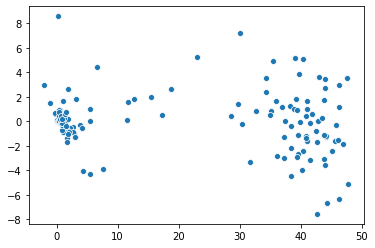

In [189]:
sn.scatterplot(results.fittedvalues,results.resid)

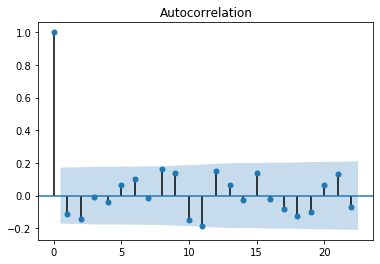

In [191]:
##we can check white noise by using acf if there is correlation present in the resid then model not got complete signal from the data
plot_acf(residuals);

we can the errors are statistically insignificant.

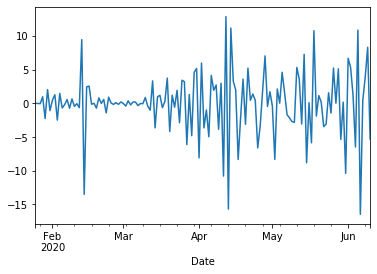

In [192]:
train_data_shift2['TargetValue'].plot()

In [193]:
pred=results.predict(start=len(training),end=len(training)+len(valid)-1,typ='levels')

typ='levels' makes the predictions of d=0 otherwise it gives the results w.r.t d=2

In [199]:
from sklearn.metrics import mean_squared_error

In [200]:
mean_squared_error(valid['TargetValue'],pred)**0.5

3.3626323999250367

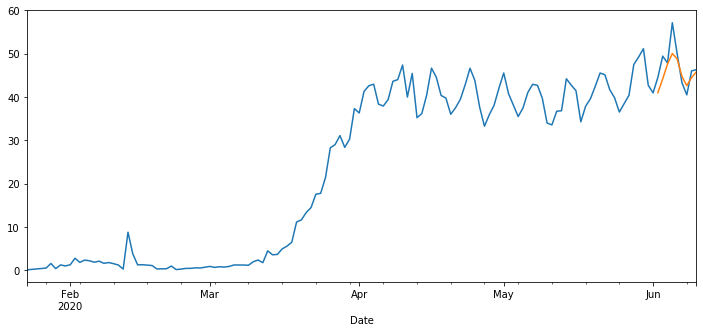

In [201]:
plt.figure(figsize=(12,5))
train_data['TargetValue'].plot()
pred.plot()

model building on whole data

In [202]:
model=stas_tsa.SARIMAX(train_data['TargetValue'],order=(1,2,2),seasonal_order=(1,0,2,7))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       TargetValue   No. Observations:                  140
Model:             SARIMAX(1, 2, 2)x(1, 0, 2, 7)   Log Likelihood                -329.197
Date:                           Sat, 25 Jul 2020   AIC                            672.394
Time:                                   14:04:11   BIC                            692.884
Sample:                               01-23-2020   HQIC                           680.721
                                    - 06-10-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9594      0.051    -18.690      0.000      -1.060      -0.859
ma.L1         -0.1943      1.414     -0.137      0.891      -2.966       2.577
ma.L2         -0.8055      1.183     -0.681      0.496      -3.125       1.514
ar.S.L7        0.9541      0.083     11.503      0.000       0.792       1.117
ma.S.L7       -0.4616      0.148     -3.111      0.002      -0.752      -0.171
ma.S.L14      -0.2413      0.115     -2.097      0.036      -0.467      -0.016
sigma2         6.5064      9.234      0.705      0.481     -11.592      24.605
===================================================================================
Ljung-Box (Q):                       70.04   Jarque-Bera (JB):                 6.85
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               2.46   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
pred_forecast=results.predict(start=len(train_data),end=len(train_data)+6,typ='levels')

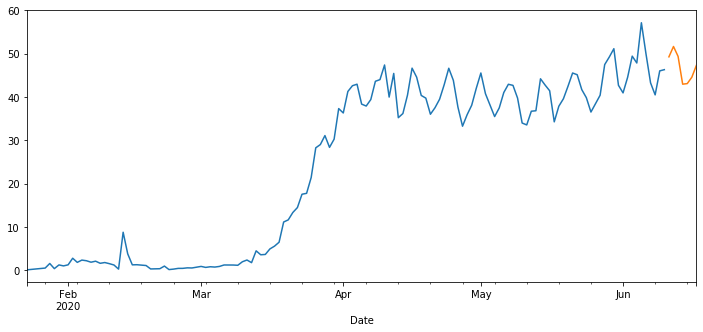

In [204]:
plt.figure(figsize=(12,5))
train_data['TargetValue'].plot()
pred_forecast.plot()

we forecasted futur values upto 7 days